In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data and handle missing values
data = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding="Latin1").dropna()
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [3]:
print('INFO:',"\n")
print(data.info(),"\n\n\n\n\n")
print('summary of the dataframe:',"\n",data.describe,"\n\n\n\n\n")
print('nunique:',"\n",data['Genre'].nunique(),"\n\n\n\n\n")
print('unique:',"\n",data['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",data.Rating.unique(),"\n\n\n\n\n")
print('unique:',"\n",data['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",data.groupby(['Genre']).count(),"\n\n\n\n\n")
print("value_counts:","\n",data["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",data.isnull().any(),"\n\n\n\n\n")

INFO: 

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB
None 





summary of the dataframe: 
 <bound method NDFrame.describe of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (20

In [6]:
def missing_values_percent(data):
    missing_values = data.isna().sum()
    percentage_missing = (missing_values / len(data) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values}) 

    return result_movie


result = missing_values_percent(data)
result

Missing Values
Name                   0
Year                   0
Duration               0
Genre                  0
Rating                 0
Votes                  0
Director               0
Actor 1                0
Actor 2                0
Actor 3                0

In [7]:
data.describe()

Rating
count  5659.000000
mean      5.898533
std       1.381165
min       1.100000
25%       5.000000
50%       6.100000
75%       6.900000
max      10.000000

In [11]:
#convert objjcets into ints
int_columns = ['Year', 'Duration']
data[int_columns] = data[int_columns].astype(int)
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


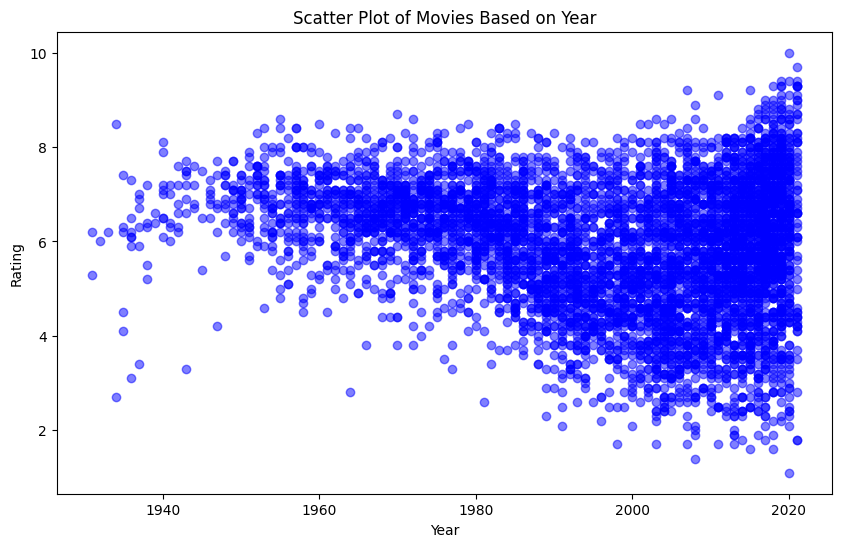

In [12]:
years = data['Year']
ratings = data['Rating']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, ratings, alpha=0.5, color='blue')
plt.title('Scatter Plot of Movies Based on Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

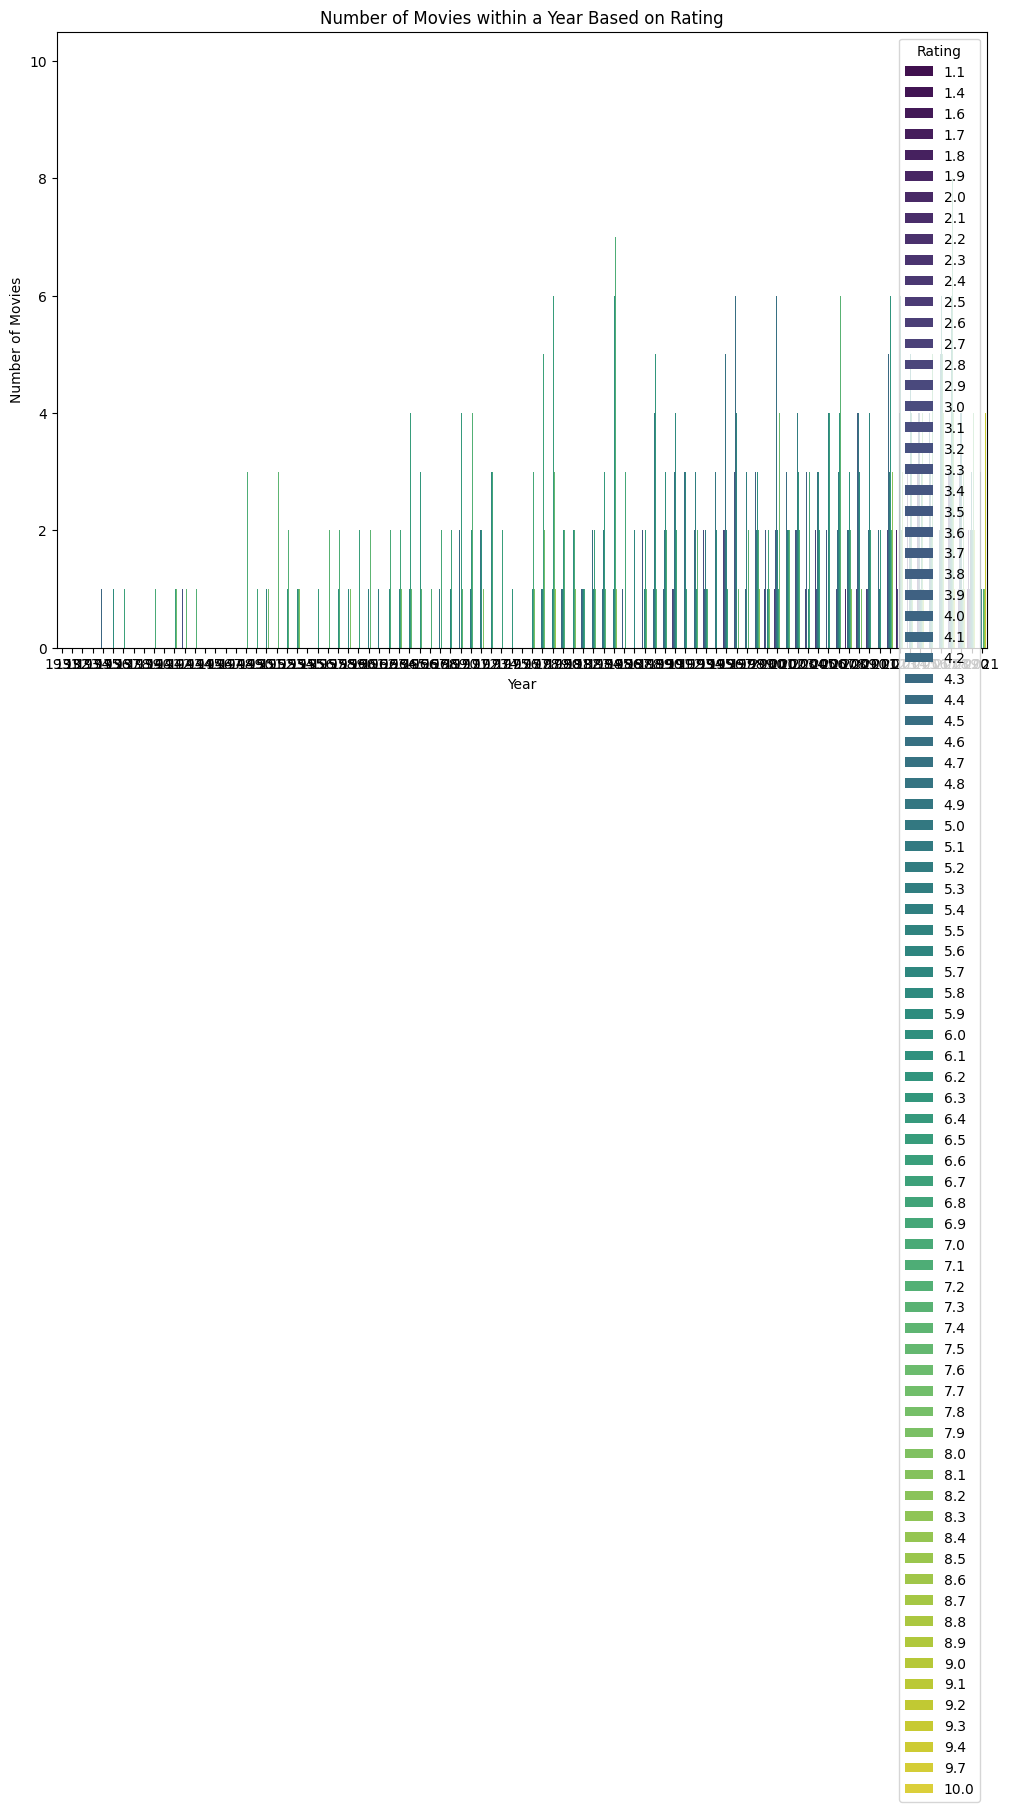

In [13]:
years = data['Year']
ratings = data['Rating']

# Create a new DataFrame with Year and Rating columns
df_year_rating = pd.DataFrame({'Year': years, 'Rating': ratings})

# Count the number of movies within a year based on rating
count_movies = df_year_rating.groupby(['Year', 'Rating']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Count', hue='Rating', data=count_movies, palette='viridis')
plt.title('Number of Movies within a Year Based on Rating')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Rating', loc='upper right')
plt.show()

In [15]:
data['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

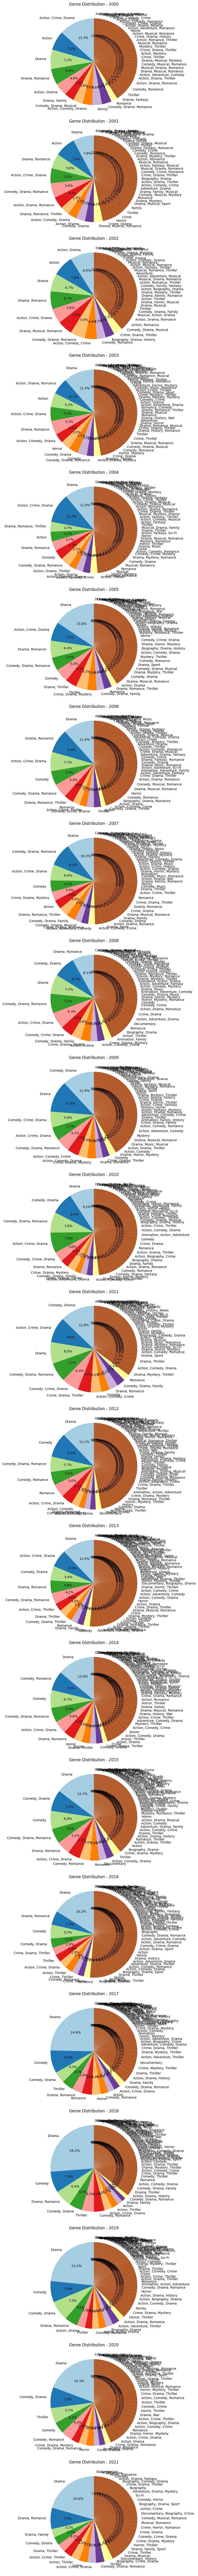

In [20]:
genres_columns = ['Genre']

# Filter data for the year range 2000-2023
filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2023)]

# Create pie charts for each year
years = sorted(filtered_data['Year'].unique())
num_years = len(years)

plt.figure(figsize=(15, 5 * num_years))

for i, year in enumerate(years, 1):
    plt.subplot(num_years, 1, i)
    
    # Filter data for the current year
    year_data = filtered_data[filtered_data['Year'] == year]
    
    # Count the number of movies for each genre
    genre_counts = year_data['Genre'].value_counts()
    
    # Create a pie chart
    plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(genre_counts))))
    plt.title(f'Genre Distribution - {year}')

plt.tight_layout()
plt.show()

In [22]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

In [24]:
from sklearn.linear_model import LinearRegression

data['Director_encoded'] = data.groupby('Director')['Rating'].transform('mean')
data['Actor_encoded'] = data.groupby('Actor 1')['Rating'].transform('mean')

# Define the features and target variable
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = data[features]
y = data['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

In [25]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have calculated y_pred, y_test, and the model is already fitted

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics in tabular form
table = [["Mean Squared Error", mse],
         ["Mean Absolute Error", mae],
         ["R2 Score", r2]]

print(tabulate(table, headers=["Metric", "Value"], tablefmt="pretty"))


+---------------------+--------------------+
|       Metric        |       Value        |
+---------------------+--------------------+
| Mean Squared Error  | 0.5242412073092312 |
| Mean Absolute Error | 0.5282885415425751 |
|      R2 Score       | 0.7168932058146814 |
+---------------------+--------------------+


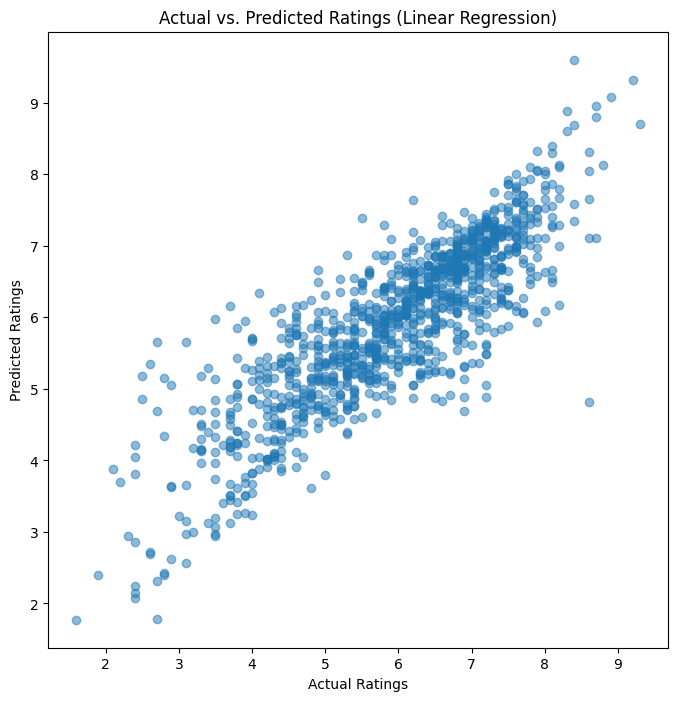

In [26]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted ratings
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings (Linear Regression)")
plt.show()
